In [ ]:


from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 25.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import re
from konlpy.tag import Okt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# 데이터 불러오기
가리산자연휴양림 = pd.read_excel("/content/gdrive/MyDrive/홍천군/가리산자연휴양림크롤링.xlsx")

# 텍스트 파일로 저장된 불용어 목록 불러오기
with open('/content/gdrive/MyDrive/홍천군/stopwords-ko.txt','r', encoding='utf-8') as f:
    stopwords = f.read().splitlines()

# NaN 값을 빈 문자열로 대체
가리산자연휴양림['본문 내용'] = 가리산자연휴양림['본문 내용'].fillna('')

# 불용어 제거 (float 방지 처리 추가)
가리산자연휴양림['본문 내용'] = 가리산자연휴양림['본문 내용'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords]) if isinstance(x, str) else x)

# 특수 문자 및 불필요한 기호 제거
가리산자연휴양림["본문 내용"] = 가리산자연휴양림["본문 내용"].apply(lambda x: re.sub(r'[^가-힣\s]', '', str(x)) if isinstance(x, str) else x)

# 줄바꿈 문자 제거
가리산자연휴양림['본문 내용'] = 가리산자연휴양림['본문 내용'].apply(lambda x: re.sub(r'[\n]', ' ', str(x)) if isinstance(x, str) else x)

# 형태소 분석
okt = Okt()
가리산자연휴양림['본문 내용'] = 가리산자연휴양림['본문 내용'].apply(lambda x: ' '.join(okt.nouns(x)) if isinstance(x, str) else x)

# 추가 불용어 목록 정의
custom_stopwords = ['홍천군', '홍천', '강원', '내촌면', '시작', '정도']  # 필요시 추가 단어
stopwords += custom_stopwords

# CountVectorizer로 문서-단어 행렬 생성 (업데이트된 stopwords 적용)
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stopwords)
X = vectorizer.fit_transform(가리산자연휴양림['본문 내용'])

# LDA 모델 설정 (토픽 개수는 5로 설정)
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# 토픽별 주요 단어 확인 함수
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# 각 토픽에서 상위 10개의 단어 출력
display_topics(lda, vectorizer.get_feature_names_out(), 10)

# 문서-주제 분포 추출
doc_topic_dist = lda.transform(X)

# 문서별로 각 토픽에 대한 확률 확인
가리산자연휴양림['주요 토픽'] = doc_topic_dist.argmax(axis=1)
print(가리산자연휴양림[['본문 내용', '주요 토픽']].head())

# 데이터프레임을 CSV로 저장
# 금학산.to_csv('/content/gdrive/MyDrive/홍천군/금학산_주요토픽_분석.csv', index=False)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가서', '같은', '것과', '결과에', '결론을', '관계가', '관련이', '그런', '그럼에도', '그렇게', '그에', '그치지', '김에', '까닭에', '낫다', '년도', '논하지', '누가', '다시', '달려', '대로', '대해', '되는', '되다', '되어', '들면', '들자면', '듯하다', '따르는', '따름이다', '따지지', '때가', '만은', '만이', '많은', '말하면', '말할것도', '몰라도', '몰랏다', '못하다', '미치다', '바꾸어서', '바꿔', '밖에', '방면으로', '보면', '보아', '부류의', '비길수', '비추어', '뿐만', '사람들', '상대적으로', '생각이다', '서술한바와같이', '쓰여', '아니다', '아니라', '안다', '안된다', '않고', '않기', '않는다면', '않다', '않다면', '않도록', '않으면', '알겠는가', '어쩔수', '없고', '없다', '예를', '외에', '요만한', '우에', '위에서', '이렇게', '이로', '이르다', '이와', '이유는', '인하여', '임에', '점에서', '정도에', '정도의', '종합한것과같이', '주저하지', '줄은', '지경이다', '틀림없다', '편이', '하고', '하기', '하기만', '하는', '하는것만', '하는것이', '하다', '하면', '하지', '한하다', '할수록', '함으로써', '해도', '해서는', '형식으로', '힘이'] not in stop_words.
  warnings.warn(


Topic 0:
가리산 정상 코스 자연휴양림 등산 고개 무쇠 하산 말재 도착
Topic 1:
가리산 계곡 자연휴양림 용소 폭포 강원도 두촌면 파크 플라잉 캠핑장
Topic 2:
가리산 자연휴양림 여행 산막 고기 계곡 강원도 숙소 아침 터미널
Topic 3:
휴양림 테이블 생각 사람 욕실 둘째 이름 방이 저녁 평상
Topic 4:
가리산 집사람 휴양림 특별자치도 일산 신축 식사 가을 사찰 거리
Topic 5:
아래 계단 시설 예약 자연휴양림 데크 산막 이용 아주 사진
Topic 6:
무쇠 출발 말재 레이더 주차장 데크 갈수 나무 왼쪽 최단
Topic 7:
가리산 산행 계단 코스 휴양림 주차장 바람 하산 주차 자연휴양림
Topic 8:
가리산 우렁이 쌈밥 최대 자연휴양림 맛집 식당 근처 방문 휴양림
Topic 9:
산막 데크 소형 자연휴양림 가리산 예약 화장실 캠핑 텐트 계곡
                                               본문 내용  주요 토픽
0  블랙 야크 명산 인증 나름 중인 효 대장 전 플로 깅 크루 산 사병 홍천 가리산 가...      0
1  임신 주 홍천 국내 여행 년 새해 저 임신 주 박일 여행 캠핑 장작 마지막 마음 가...      2
2  철원 두루 웰 숲속 문화 촌 다음 목적지 홍천 가리산 휴양림 도착 오후 시가 숙소 ...      4
3  가리산 자연휴양림 공사 기간 주차장 입장료 편의 시설 박 일 아들 인제 속초 바퀴 ...      0
4  당일치기 강원도 홍천 여행 오늘 월 일 홍천 맥주 축제 홍천 도착 점심 간 곳 가리...      8


In [ ]:
# import pandas as pd

# 금학산 = pd.read_excel("/content/gdrive/MyDrive/홍천군/금학산크롤링.xlsx")

# #텍스트 파일로 저장

# with open('/content/gdrive/MyDrive/홍천군/stopwords-ko.txt','r', encoding ='utf-8') as f:
#     stopwords = f.read().splitlines()

# #불용어 제거
# 금학산['본문 내용'] = 금학산['본문 내용'].apply(lambda x:' '.join([word for word in x.split() if word not in stopwords]))
# # 공작산수타사

# 금학산 = 금학산.drop(columns=["블로그 링크"])
# import re


# # 특수 문자 및 불필요한 기호 제거
# 금학산["본문 내용"] = 금학산["본문 내용"].apply(lambda x: re.sub(r'[^가-힣\s]', '', x))

# 금학산['본문 내용'] = 금학산['본문 내용'].apply(lambda x:re.sub(r'[\n]',' ',x))


# #형태소 분석
# from konlpy.tag import Okt

# okt = Okt()
# 금학산['본문 내용'] = 금학산['본문 내용'].apply(lambda x: ' '.join(okt.nouns(x)))

# # countvectorizer 진행

# from sklearn.decomposition import LatentDirichletAllocation
# from sklearn.feature_extraction.text import CountVectorizer

# # CountVectorizer로 문서-단어 행렬 생성
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stopwords)
# X = vectorizer.fit_transform(금학산['본문 내용'])

# # 불용어 목록에 추가할 단어 (제거할 키워드들)
# custom_stopwords = ['홍천군','홍천','강원','내촌면','시작','정도']  # 추가로 제거할 단어

# # 기본 불용어 + 추가 불용어 리스트 설정
# stopwords = stopwords + custom_stopwords  # stopwords는 이미 정의된 기본 불용어 리스트라고 가정


# # CountVectorizer로 문서-단어 행렬 생성 (업데이트된 stopwords 적용)
# vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stopwords)
# X = vectorizer.fit_transform(금학산['본문 내용'])

# # 단어 목록과 빈도수 추출
# word_counts = X.toarray().sum(axis=0)
# words = vectorizer.get_feature_names_out()

# # 빈도수가 높은 단어 출력
# import pandas as pd
# word_freq_df = pd.DataFrame({'단어': words, '빈도수': word_counts})
# word_freq_df = word_freq_df.sort_values(by='빈도수', ascending=False)


# # LDA 모델 설정 (토픽 개수는 5로 설정)
# lda = LatentDirichletAllocation(n_components=10, random_state=42)
# lda.fit(X)


# # 토픽별 주요 단어 확인
# def display_topics(model, feature_names, no_top_words):
#     for topic_idx, topic in enumerate(model.components_):
#         print(f"Topic {topic_idx}:")
#         print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# # 각 토픽에서 상위 10개의 단어 출력
# # display_topics(lda, vectorizer.get_feature_names_out(), 100)


# # 문서-주제 분포 추출 (LDA 모델의 transform 메서드를 사용하여 문서의 토픽 분포 추출)
# doc_topic_dist = lda.transform(X)

# # 문서별로 각 토픽에 대한 확률을 확인할 수 있습니다.







/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

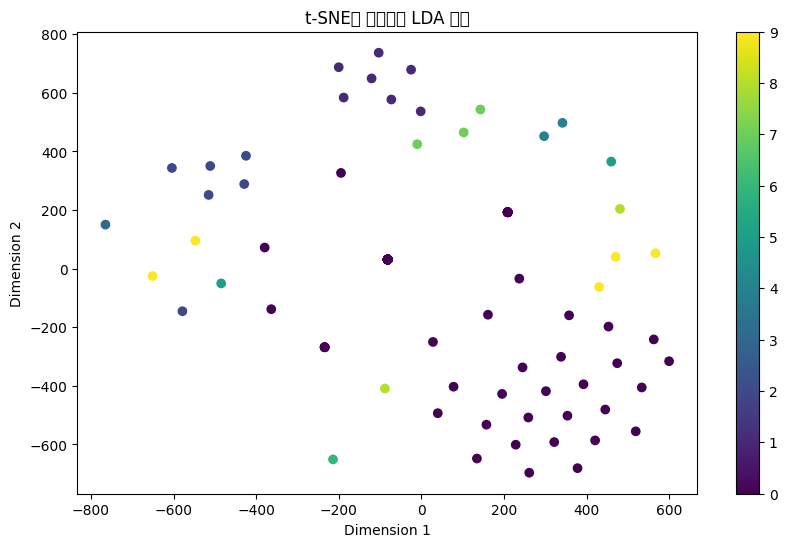

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

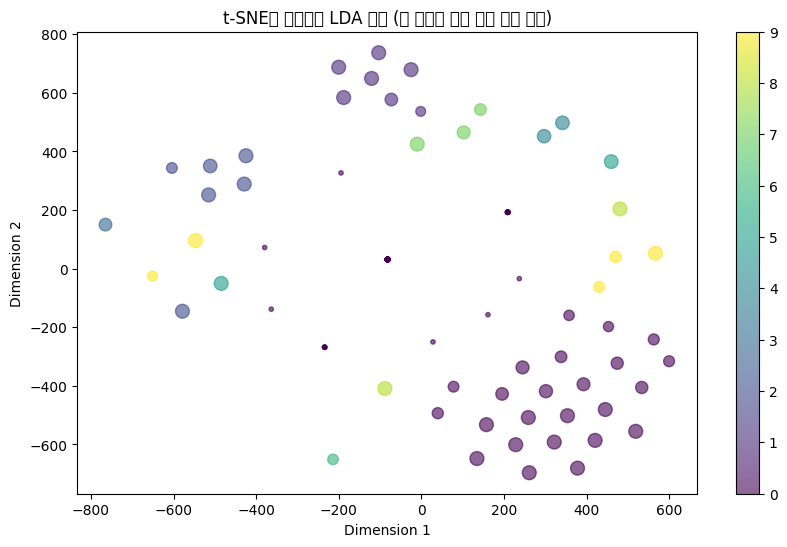

In [5]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNE를 사용하여 차원 축소 (2차원으로 축소)
tsne_model = TSNE(n_components=2, random_state=42)
tsne_lda = tsne_model.fit_transform(doc_topic_dist)

# 차원 축소된 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(tsne_lda[:, 0], tsne_lda[:, 1], c=doc_topic_dist.argmax(axis=1))  # 각 문서의 가장 중요한 토픽으로 색상 구분
plt.colorbar()
plt.title('t-SNE로 시각화한 LDA 결과')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()



import matplotlib.pyplot as plt
import numpy as np

# t-SNE로 차원 축소된 값인 tsne_lda 사용
# 각 문서에서 가장 큰 토픽 확률을 점의 크기로 사용
doc_sizes = np.max(doc_topic_dist, axis=1) * 100  # 확률에 비례하여 점 크기 설정

# 시각화 (원의 크기는 확률에 비례)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_lda[:, 0], tsne_lda[:, 1], s=doc_sizes, c=doc_topic_dist.argmax(axis=1), cmap="viridis", alpha=0.6)

# 컬러바 추가
plt.colorbar(scatter)
plt.title('t-SNE로 시각화한 LDA 결과 (점 크기는 주요 토픽 확률 비례)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()



In [ ]:
# 군집을 확인해보면 초록색, 파란색이 군집이 잘 이뤄진 것을 확인할 수 있다.
# 보라색도 군집이 이뤄졌지만, 분포가 큰 것을 확인할 수 있다.
# 초록색 계열 군집은 그 수가 적은편인 것으로 보아 분석에서 제외하는 것을 고려할 수 있다.

#서로 다른 색상이 일정한 거리를 유지하고 있을 경우, 이는 주제 간에 명확한 차별성이 있다는 것을 나타낸더.
# 반면 색상이 섞여 있다면 이는 다양한 주제가 혼합된 문서들이 존재한다는 것을 의미한다.
# 큰 점들은 그 문서에서 하나의 주제가 매우 중요한 역할을 한다는 것을 의미한다.


In [ ]:
# display_topics(lda, vectorizer.get_feature_names_out(), 100)


# ###


In [ ]:
# 토픽별 데이터프레임 저장

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

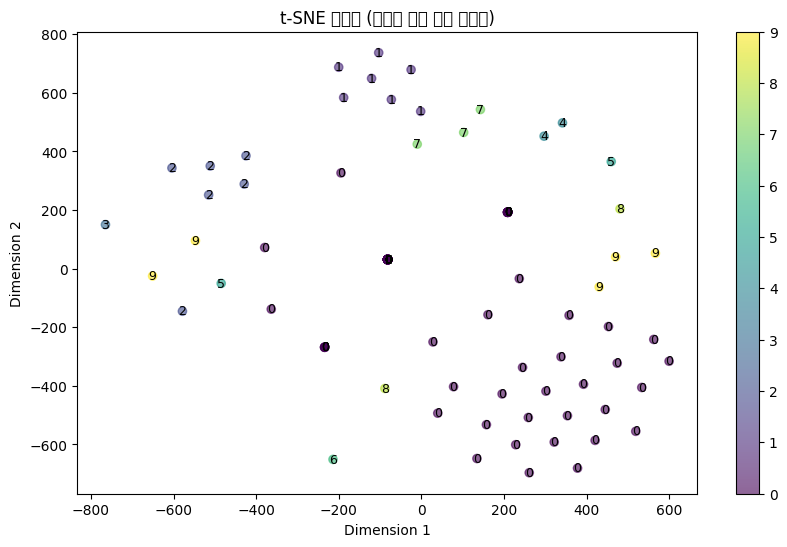

In [6]:
import pandas as pd

# 각 토픽별 상위 키워드를 저장하는 함수
def get_topics_dataframe(model, feature_names, no_top_words):
    topics = []
    for topic_idx, topic in enumerate(model.components_):
        topic_keywords = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics.append({"토픽 번호": f"Topic {topic_idx}", "주요 키워드": ", ".join(topic_keywords)})
    return pd.DataFrame(topics)

# 각 토픽별 상위 50개의 단어를 저장한 데이터프레임 생성
topics_df = get_topics_dataframe(lda, vectorizer.get_feature_names_out(), 50)

# 데이터프레임 확인
topics_df

# CSV 파일로 저장
topics_df.to_csv('lda금학산_topics_keywords.csv', index=False)



### 데이터 프레임 군집 라벨링
import pandas as pd

# 문서-주제 분포 계산 (lda.transform()을 통해 얻은 결과)
doc_topic_dist = lda.transform(X)

# 각 문서에서 가장 높은 확률을 가진 주제를 할당
dominant_topic = doc_topic_dist.argmax(axis=1)

# 기존 데이터프레임에 토픽 정보 추가
가리산자연휴양림['주요 토픽'] = dominant_topic

# 토픽 번호와 문서 간 매칭 데이터프레임 확인
가리산자연휴양림[['본문 내용', '주요 토픽']].head()


import matplotlib.pyplot as plt
import numpy as np

# t-SNE로 차원 축소된 값 사용
# 각 문서에서 가장 높은 토픽 확률을 기반으로 색상 지정
plt.figure(figsize=(10, 6))

# 각 문서의 주요 토픽으로 색상을 구분하여 시각화
scatter = plt.scatter(tsne_lda[:, 0], tsne_lda[:, 1], c=dominant_topic, cmap="viridis", alpha=0.6)

# 각 점에 문서의 주요 토픽 라벨 추가
for i, label in enumerate(dominant_topic):
    plt.text(tsne_lda[i, 0], tsne_lda[i, 1], str(label), fontsize=9, ha='center', va='center')

plt.colorbar(scatter)
plt.title('t-SNE 시각화 (문서별 주요 토픽 라벨링)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


